In [1]:
import numpy as np
# import torch
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
"""best set1"""
# lam_U1 = lambda t:(np.power(np.cos(t*2*np.pi),3)*np.sin(t*2*np.pi), -np.power(np.sin(t*2*np.pi),3))
# lam_U2 = lambda t:(-np.cos(t*3*np.pi)*np.sin(t*2*np.pi)*np.sin(t*2*np.pi),np.sin(t*2*np.pi))


"""best set2"""
# lam_U1 = lambda t:(-np.power(np.sin(t*3*np.pi),2)*np.sin(t*2*np.pi), -np.power(np.sin(t*2*np.pi),3))
# lam_U2 = lambda t:(-np.cos(t*3*np.pi)*np.cos(t*2*np.pi)*np.sin(t*2*np.pi),np.sin(t*2*np.pi))

"""best set3"""
# lam_U1 = lambda t:(np.power(np.sin(t*1*np.pi),2)*np.sin(t*2*np.pi), -np.power(np.sin(t*2*np.pi),3))
# lam_U2 = lambda t:(-np.cos(t*1*np.pi)*np.cos(t*2*np.pi)*np.sin(t*2*np.pi),np.sin(t*2*np.pi))
"""best set4"""
# lam_U1 = lambda t:(-np.power(np.sin(t*1*np.pi),3)*np.sin(t*2*np.pi), -np.power(np.sin(t*2*np.pi),3))
# lam_U2 = lambda t:(-np.cos(t*1*np.pi)*np.sin(t*3*np.pi)*np.sin(t*2*np.pi),np.sin(t*2*np.pi))



"""best set5"""

# lam_U1 = lambda t:-np.power(np.sin(t*2*np.pi),3)
lam_U1 = lambda t:np.sin(t*2*np.pi)*np.cos(t*2*np.pi)*np.sin(t*2*np.pi)

lam_U2 = lambda t:(1-np.power(np.sin(t*0.5*np.pi),3))*np.sin(t*4*np.pi)
lam_U3 = lambda t:np.power(np.sin(t*2*np.pi),1)
lam_U4 = lambda t:-2*np.cos(t*3*np.pi)*np.sin(t*3*np.pi)*np.sin(t*2*np.pi)
lam_U5 = lambda t:np.exp(-2*t) * ((np.sin(t*1.5*np.pi)))

lam_U = [lam_U1, lam_U2, lam_U3, lam_U4]

dims = [50,50,50]




N = 50000
N_test = 1000
# N_sample_max = 4000
time_points_train = np.sort(np.random.rand(N))#np.linspace(0, 1, N)
# time_points_train = np.linspace(0, 1, N)

time_points_train[0] = 0.00
time_points_test = np.sort(np.random.rand(N_test))

time_all = np.concatenate((time_points_train, time_points_test))


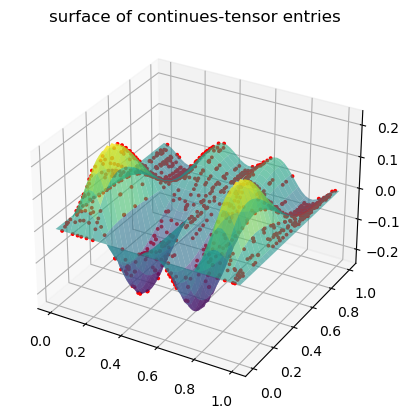

In [316]:
def f(x, y):
    return lam_U1(x)*lam_U5(y)
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# np.random.seed(12)

# U1_ind_CONTI = np.sort(np.random.rand(15))
# U2_ind_CONTI = np.sort(np.random.rand(15))

# X_train, Y_train = np.meshgrid(U1_ind_CONTI, U2_ind_CONTI)


X_train_list = []
Y_train_list = []
Z_train_list = []

for i in range(6):

    U1_ind_CONTI = np.sort(np.random.rand(15))
    U2_ind_CONTI = np.sort(np.random.rand(15))
    X_train,Y_train = np.meshgrid(U1_ind_CONTI, U2_ind_CONTI)
    Z_train = f(X_train, Y_train) 
    X_train_list.append(X_train.reshape(-1))
    Y_train_list.append(Y_train.reshape(-1))
    Z_train_list.append(Z_train.reshape(-1))

 

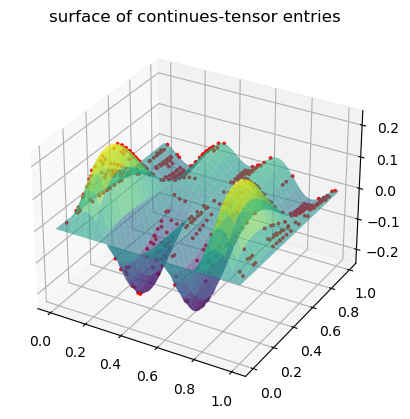

In [321]:
X_train = np.concatenate(X_train_list[:-4])
Y_train = np.concatenate(Y_train_list[:-4])
Z_train = np.concatenate(Z_train_list[:-4])    


ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                cmap='viridis', edgecolor='none', alpha=0.6)

ax.scatter(X_train.reshape(-1), Y_train.reshape(-1),  Z_train.reshape(-1), c='red', marker='o', s=3,alpha=1);

ax.set_title('surface of continues-tensor entries');


X_train = np.concatenate(X_train_list)
Y_train = np.concatenate(Y_train_list)
Z_train = np.concatenate(Z_train_list)    

In [317]:
df = pd.DataFrame()
df['U1'] = X_train.reshape(-1)
df['U2'] = Y_train.reshape(-1)
df['Y'] = Z_train.reshape(-1)


def make_continues_mode(df, mode, decimals=6, normalize=1):

    target_df = df[mode].round(decimals)
    if normalize:
        df[mode+'_CONTI'] = normalize* (target_df-target_df.min())/(target_df.max()-target_df.min())

    df[mode+'_DISCT'],CONTI_2_DISCT_dict,DISCT_2_CONTI_dict = unique_recoding(df[mode+'_CONTI'])
    print('decimal: %d '%(decimals),mode,len(df[mode+'_DISCT'].unique()))

    return CONTI_2_DISCT_dict,DISCT_2_CONTI_dict

def unique_recoding(target_df):
    # colum_name = 'movieId'
    unique_key = np.sort(target_df.unique())
    CONTI_2_DISCT_dict = {key:id for id,key in enumerate(unique_key)}
    DISCT_2_CONTI_dict = {id:key for id,key in enumerate(unique_key)}

    new_column = target_df.apply(lambda x:CONTI_2_DISCT_dict[x])
    return new_column,CONTI_2_DISCT_dict,DISCT_2_CONTI_dict



CONTI_2_DISCT_dict_list = {}
DISCT_2_CONTI_dict_list = {}

for mode in ['U1','U2']:
    CONTI_2_DISCT_dict, DISCT_2_CONTI_dict = make_continues_mode(df,mode, decimals=6, normalize=1)
    CONTI_2_DISCT_dict_list[mode] = CONTI_2_DISCT_dict
    DISCT_2_CONTI_dict_list[mode] = DISCT_2_CONTI_dict

decimal: 6  U1 90
decimal: 6  U2 90


In [318]:

target_modes = ['U1','U2']
target_pollute = 'Y'

# def process_conti_data(target_pollute,target_modes):
modes_DISCT = [mode+'_DISCT' for mode in target_modes]
modes_CONTI = [mode+'_CONTI' for mode in target_modes]

CONTI_2_DISCT_dicts = [CONTI_2_DISCT_dict_list[mode] for mode in target_modes]
DISCT_2_CONTI_dicts = [DISCT_2_CONTI_dict_list[mode] for mode in target_modes]


ndims = [df[mode].max()+1 for mode in modes_DISCT]
print('ndims:',ndims)

N = len(df)
Ntr = int(N * 0.5)
idx = np.arange(N)
folds = []
for i in range(1):
    np.random.shuffle(idx)
    tr_idx = idx[:Ntr]
    tr_y = df[target_pollute][tr_idx].values
    tr_ind_DISCT = df[modes_DISCT].values[tr_idx,:]
    tr_ind_CONTI = df[modes_CONTI].values[tr_idx,:]

    te_idx = idx[Ntr:]
    te_y = df[target_pollute][te_idx].values
    te_ind_DISCT = df[modes_DISCT].values[te_idx,:]
    te_ind_CONTI = df[modes_CONTI].values[te_idx,:]

    # track the never-seen idx in test data
    never_seen_test_idx = []
    for mode in range(len(target_modes)):
        train_set = set(np.unique(tr_ind_DISCT[:,mode]))
        full_set = set(DISCT_2_CONTI_dicts[mode].keys())
        never_seen_test_idx.append(list(full_set.difference(train_set)))



    # add groud truth
    U1_traj = lam_U1(np.array(list(CONTI_2_DISCT_dicts[0].keys())))
    U2_traj = lam_U5(np.array(list(CONTI_2_DISCT_dicts[1].keys())))


    folds.append({
        'tr_ind_DISCT': tr_ind_DISCT,
        'tr_ind_CONTI': tr_ind_CONTI,
        'tr_y': tr_y,
        'te_ind_DISCT': te_ind_DISCT,
        'te_ind_CONTI': te_ind_CONTI,
        'te_y': te_y,
        'ndims':ndims,
        'never_seen_test_idx':never_seen_test_idx,
        'U1_traj_true':U1_traj,
        'U2_traj_true':U2_traj,
        'X_train':X_train,
        'Y_train':Y_train,
        'Z_train':Z_train,
    })

data = {'ndims': ndims, 'data': folds,'CONTI_2_DISCT_dicts':CONTI_2_DISCT_dicts, 'DISCT_2_CONTI_dicts':DISCT_2_CONTI_dicts}
ndim_str = "x".join([str(i) for i in ndims])

dict_name = '../synthetic/'
Path(dict_name).mkdir(parents=True, exist_ok=True)

file_name = 'simulation_r1.npy'

print(file_name)
np.save(dict_name + file_name, data)


ndims: [90, 90]
simulation_r1.npy
